### Importing the data
Take a look at the StackOverflow 2017 Survey data. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

# import data and take a quick look at the first few rows.

df = pd.read_csv('/Users/ruowei/Desktop/Udacity learning/so-survey-2017/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Show the structure of the dataset.

In [3]:
print(df.shape[0]) # provide number of rows in the dataset
print(df.shape[1]) # provide number of columns in the dataset

51392
154


### Question 1: Is there a gender gap in terms of salary for SO developers?


Examine the gender variable.

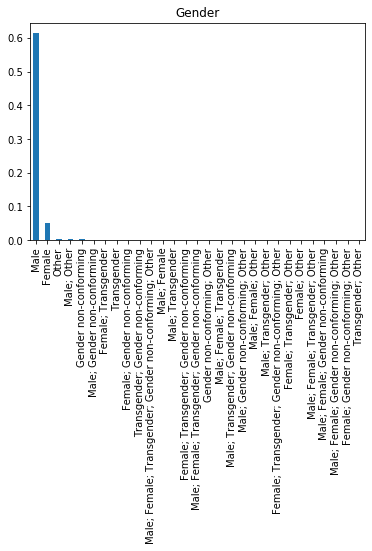

In [4]:
# Produce a bar chart of different gender types
gender_dis = df.Gender.value_counts()
(gender_dis/df.shape[0]).plot(kind="bar");
plt.title("Gender");

It looks like that there are many complicated/combined entries with more than one value. For the following I will only look at those with a value of either "male" or "female".

Male      0.923952
Female    0.076048
Name: Gender, dtype: float64


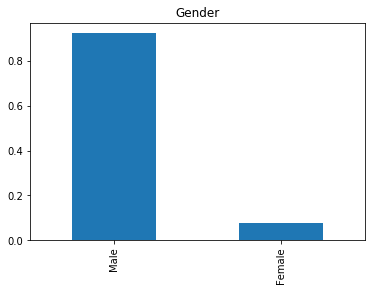

In [5]:
# Subset the dataset to those who answered either "female" or "male"
gender_new = df.loc[df['Gender'].isin(['Male', 'Female'])]
# provide the number of males and females
gender_dis = gender_new.Gender.value_counts()
print(gender_dis/gender_new.shape[0])
(gender_dis/gender_new.shape[0]).plot(kind="bar");
plt.title("Gender");

There were 31589 males and 2600 males in the dataset. Next I'll produce the mean salary between males and females.

Gender
Female    58083.924534
Male      56996.494293
Name: Salary, dtype: float64


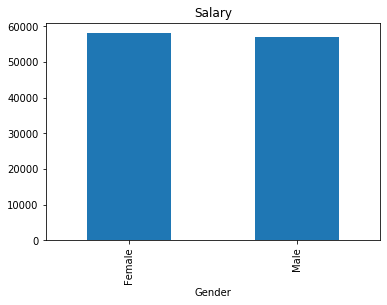

In [6]:
# show mean salaries for males and females
gender_sal = gender_new['Salary'].groupby(gender_new["Gender"]).mean()
print(gender_sal)
(gender_sal).plot(kind="bar");
plt.title("Salary");

I'm a bit suprised that females earn more than males (58083 vs. 56996).
Although the gap is pretty small. Could it be that the missing patterns are different for males and females?

In [8]:
# examine the percentage of missing values for salary
gender_new['Salary'].isnull().sum()/gender_new.shape[0]

0.664073239930972

From the above we can see there are 66% of missing values in the salary 
column for people who identified as either male or female. Next I will create a dummy variable based on missing salary.

In [116]:
# produce a series of numbers indicating missing salary as "missing_values"
salary_dummy = pd.get_dummies(gender_new['Salary'], dummy_na=True)
missing_values = salary_dummy[salary_dummy.columns[-1]]
missing_values.head()

0    1
1    1
2    0
3    1
6    1
Name: nan, dtype: uint8

In [117]:
# merge the missing value variable back to the dataset
gender_new['missing_salary'] = missing_values

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Gender
Female    0.685000
Male      0.662351
Name: missing_salary, dtype: float64


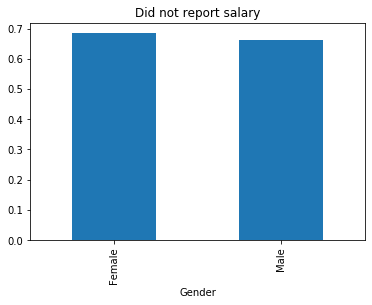

In [119]:
# show percentage of females and males who did not report salary
missing_salary = gender_new['missing_salary'].groupby(gender_new["Gender"]).mean()
print(missing_salary)
(missing_salary).plot(kind="bar");
plt.title("Did not report salary");

# alternatively can show this:
#df.query('Gender == "Male"')['Salary'].isnull().mean()
#df.query('Gender == "Female"')['Salary'].isnull().mean()

It seems that females are also slightly less likely to report salary. Therefore, it is hard to know whether there is a gender gap by salary from this dataset. But what about expected salary? Can this be used as a proxy?

Gender
Female    29830.759637
Male      33786.512090
Name: ExpectedSalary, dtype: float64


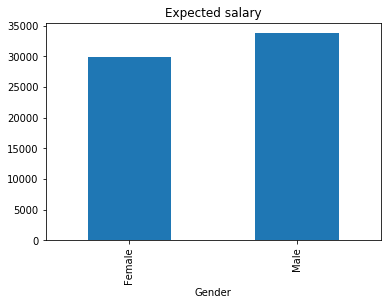

In [9]:
# show mean expected salaries for males and females
expected_salary = gender_new['ExpectedSalary'].groupby(gender_new["Gender"]).mean()
print(expected_salary)
(expected_salary).plot(kind="bar");
plt.title("Expected salary");

From the above we can see that females expect less salary than males. This might indicate a slight salary disadvantage for females in the field of developers. Let's also dive into the missing values for expected salary by gender.

In [78]:
# percentage of missing values for expected salary
gender_new['ExpectedSalary'].isnull().sum()/gender_new.shape[0]

0.9400684430664834

In [79]:
# create column for missing expected salary
expsalary_dummy = pd.get_dummies(gender_new['ExpectedSalary'], dummy_na=True)
missing_expsalary = expsalary_dummy[salary_dummy.columns[-1]]
gender_new['missing_expsalary'] = missing_expsalary

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [80]:
# percentage of missing expected salary by gender
gender_new['missing_expsalary'].groupby(gender_new["Gender"]).mean()

Gender
Female    0.938846
Male      0.940169
Name: missing_expsalary, dtype: float64

### Conclusion
Given that females were slightly more likely to report expected salary but their reported expected salary was lower, females might be at a disadvantage in terms of equal pay as developers because they expect less salary to start with. However, there were too many missing values for salary in the dataset so we cannot really know for sure if there is a salary gap by gender. Self-reporting is not a good way to collect sensitive financial data such as salary as many people just wouldn't respond to those questions.

### Question 2: Which developer types have the highest career satisfaction?

First I'll take a look at the distribution of career satisfaction by developer type.

In [10]:
# show career satisfaction by developer type
grouped = df['CareerSatisfaction'].groupby(df["DeveloperType"]).mean().reset_index()
# sort by career satisfaction
grouped = grouped.sort_values('CareerSatisfaction', ascending = False)
print(grouped)

                                          DeveloperType  CareerSatisfaction
910   Web developer; Embedded applications/devices d...                10.0
569   Mobile developer; Graphics programming; Machin...                10.0
561   Mobile developer; Graphics programming; Develo...                10.0
559   Mobile developer; Graphics programming; Develo...                10.0
1241  Web developer; Mobile developer; Database admi...                10.0
...                                                 ...                 ...
1305  Web developer; Mobile developer; Developer wit...                 NaN
1458  Web developer; Mobile developer; Embedded appl...                 NaN
1538  Web developer; Mobile developer; Embedded appl...                 NaN
1566  Web developer; Mobile developer; Embedded appl...                 NaN
1711  Web developer; Mobile developer; Graphics prog...                 NaN

[1823 rows x 2 columns]


Because the variable DeveloperType allows multiple values for a single person, it means that there are many many different combinations of types, and the above list doesn't provide much useful information because the type is too specific. For example, a person can be a mobile developer, web developer and database administrator, the next person can be a mobile developer, web developer and embedded applications/device devloper, although the two people have some overlap of job functions, they are categorized differently. 

In [30]:
# check missing data of the developer type variable
df["DeveloperType"].isnull().mean()

0.29706958281444584

There is 29% missing for the developer type variable. However, because it is categorized in such a specific way, I decided dropping instead of imputing the missing values.

Because there are too many unique values of the developer type variable, it would be hard to visualize career satisfaction by type. I will reorganize the data so that the first type in any entry is assumed to be the primary developer type.

In [175]:
# create the variable 'primary_dev_type' to 
# inidicate the first string in the DeveloperType variable

df['Primary_dev_type'] = df['DeveloperType'].str.split(';').str[0]

In [176]:
# Produce list of career satisfaction by primary devloper type:
grouped1= df['CareerSatisfaction'].groupby(df["Primary_dev_type"]).mean().reset_index()
grouped1 = grouped1.sort_values('CareerSatisfaction', ascending = False)
print(grouped1)

                                     Primary_dev_type  CareerSatisfaction
8                         Machine learning specialist            7.628866
9                                    Mobile developer            7.495213
10                                              Other            7.479346
13                                      Web developer            7.439885
7                                Graphics programming            7.424437
3                                   DevOps specialist            7.411255
5             Embedded applications/devices developer            7.389564
12                              Systems administrator            7.300000
0                                      Data scientist            7.240991
4   Developer with a statistics or mathematics bac...            7.233498
1                              Database administrator            7.207143
2                      Desktop applications developer            7.201735
11                         Quality ass

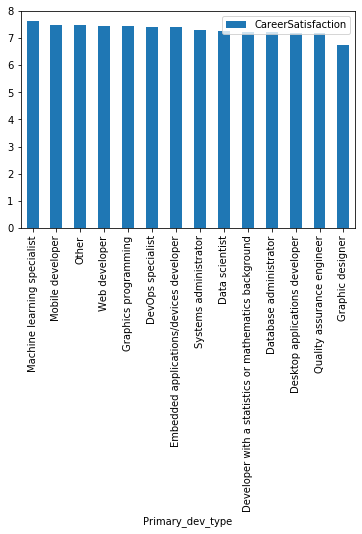

In [177]:
# Plot career satisfaction by primary devloper type:
grouped1.set_index("Primary_dev_type",drop=True,inplace=True)
(grouped1).plot(kind="bar");

### Conclusion
It appears that machine learning specialists have the highest career satisfaction, followed by mobile developers, other developers, and web developers and so on. However, the career satisfaction rating does not differ much since the range between the lowest and the highest is pretty narrow (lowest: 6.75 for graphic desginer; highest: 7.63 for machine learning specialist)

### Question 3: What kind of activities developers most frequently do on StackOverflow?

There are eight questions asked in the SO survey in terms of how frequently developers perform certain activities over the last three months on the SO website: 
* Found an answer that solved my coding problem
* Copied a code example and pasted it into my codebase
* Seen a job listing I was interested in
* Researched a potential employer by visiting its company page
* Searched for jobs
* Asked a new question
* Written a new answer to someone else's question
* Participated in community discussions on meta or in chat

In [39]:
# select columns about the SO activity questions
df1 = df[["StackOverflowFoundAnswer", "StackOverflowCopiedCode", 
              "StackOverflowJobListing", "StackOverflowCompanyPage",
              "StackOverflowJobSearch", "StackOverflowNewQuestion",
              "StackOverflowAnswer", "StackOverflowMetaChat"]]

In [33]:
# check missing values of the above variables
df1.isnull().mean()

StackOverflowFoundAnswer    0.332776
StackOverflowCopiedCode     0.340189
StackOverflowJobListing     0.348770
StackOverflowCompanyPage    0.349412
StackOverflowJobSearch      0.349802
StackOverflowNewQuestion    0.345851
StackOverflowAnswer         0.347058
StackOverflowMetaChat       0.349957
dtype: float64

There is at least 30% missing for each of these items. However, if I fill the values with mode or the most freuqently occurring value, it would only inflate that value. I decided to ignore missing values in this case.

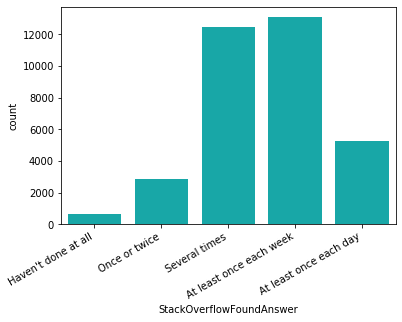

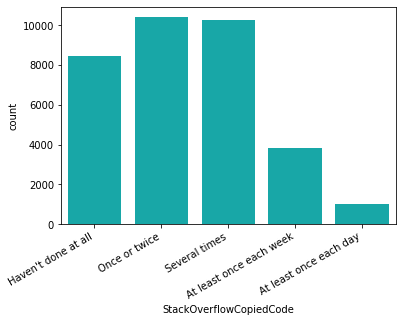

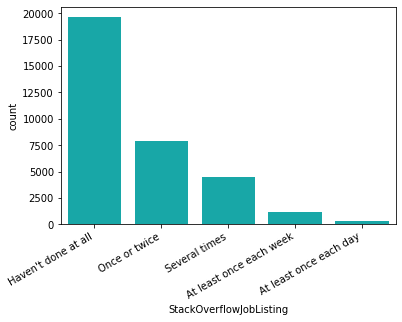

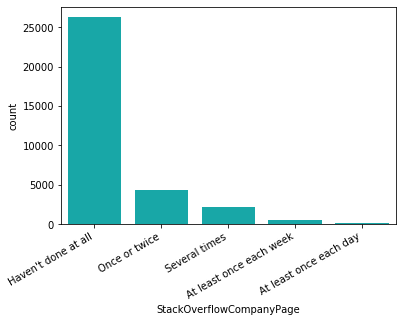

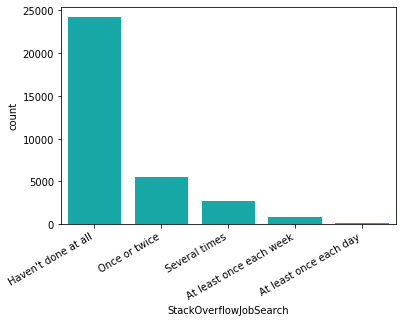

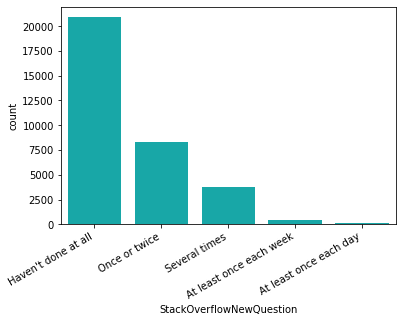

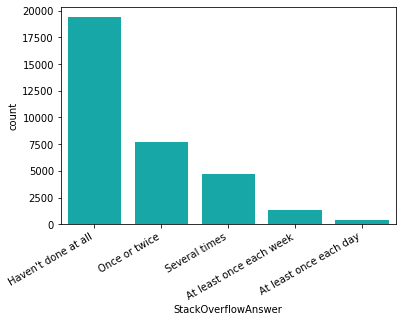

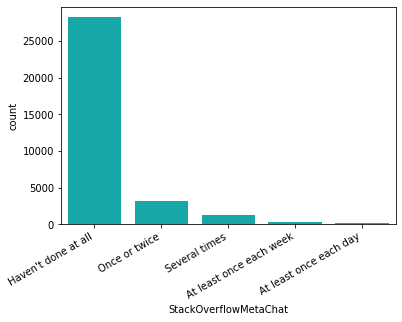

In [40]:
# plot each activity
import seaborn as sns
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, order=["Haven't done at all",'Once or twice','Several times','At least once each week','At least once each day'], data=df1, color = 'c')
    plt.xticks(rotation=30, horizontalalignment='right')

### Conclusion
The most popular activity seems to be finding an answer that solves a coding problem, with the majority of respondents engaging in it at least once each week. The second is copying code, as most did this once or twice, or several times in the past. The remaining activities don't seem to be so popular since most developers haven't done it at all.